In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Importing dataset
data = pd.read_csv("train.csv")

In [35]:
#remove dups
#sorting by  name 
data.sort_values("Name", inplace = True) 
  
#dropping ALL duplicte values 
data.drop_duplicates(subset ="Name", 
                     keep = False, inplace = True) 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C


In [36]:
# dropping passed "columns 
data.drop(["SibSp", "Parch","Ticket", "Fare", "Cabin", "Embarked"], axis = 1, inplace = True)

In [37]:
import numpy as np
data['isBoy'] = np.where((data['Age'] < 18.0) & (data['Sex'] == 'male'), 'yes', 'no')
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,isBoy
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,no
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,yes
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,no
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,no
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,no


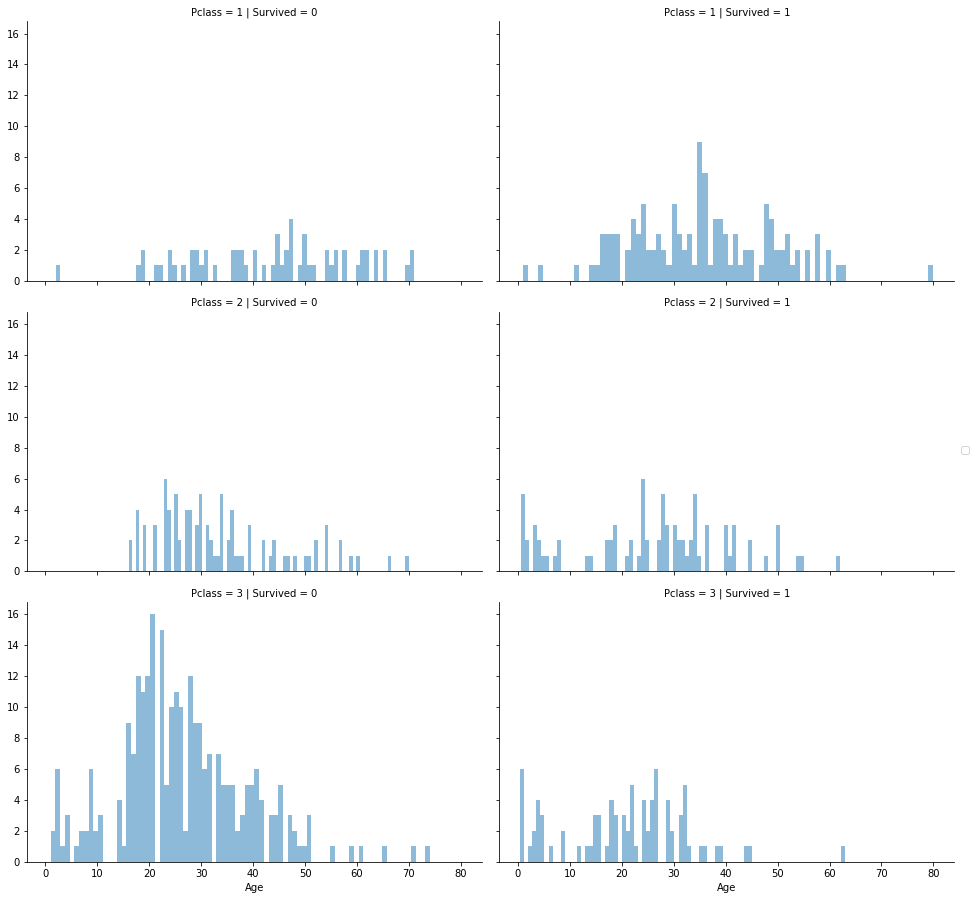

In [39]:
import seaborn as sns
grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=4.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=80)
grid.add_legend();

In [9]:
data['isMen'] = np.where((data['Age'] >= 18) & (data['Sex'] == 'male'), 'yes', 'no')
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,isBoy,isMen
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,no,yes
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,yes,no
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,no,yes
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,no,yes
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,no,no


In [10]:
data['isWoman'] = np.where((data['Age'] >= 18) & (data['Sex'] == 'female'), 'yes', 'no')
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,isBoy,isMen,isWoman
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,no,yes,no
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,yes,no,no
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,no,yes,no
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,no,yes,no
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,no,no,no


In [ ]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=4.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=80)
grid.add_legend();

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,isBoy,isMen,isWoman
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,no,yes,no
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,yes,no,no
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,no,no,yes
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,no,yes,no
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,no,no,yes


In [14]:
# Convert categorical variable to numeric
data["Sex_cleaned"]=np.where(data["Sex"]=="male",0,1)

In [17]:
# Cleaning dataset of NaN
data=data[[
    "Survived",
    "Pclass",
    "Sex_cleaned",
    "Age"
]].dropna(axis=0, how='any')

In [18]:
# Split dataset in training and test datasets
X_train, X_test = train_test_split(data, test_size=0.5, random_state=int(time.time()))

In [26]:
# Instantiate the classifier
gnb = GaussianNB()
used_features =[
    "Pclass",
    "Survived",
    "Sex_cleaned",
    "Age" 
   
]

# Train classifier
gnb.fit(
    X_train[used_features].values,
    X_train["Survived"]
)
y_pred = gnb.predict(X_test[used_features])

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["Survived"] != y_pred).sum(),
          100*(1-(X_test["Survived"] != y_pred).sum()/X_test.shape[0])
))

Number of mislabeled points out of a total 357 points : 0, performance 100.00%


In [27]:
mean_survival=np.mean(X_train["Survived"])
mean_not_survival=1-mean_survival
print("Survival prob = {:03.2f}%, Not survival prob = {:03.2f}%"
      .format(100*mean_survival,100*mean_not_survival))

Survival prob = 43.98%, Not survival prob = 56.02%


In [28]:
mean_fare_survived = np.mean(X_train[X_train["Survived"]==1]["Pclass"])
std_fare_survived = np.std(X_train[X_train["Survived"]==1]["Pclass"])

print("mean_fare_survived = {:03.2f}".format(mean_fare_survived))
print("std_fare_survived = {:03.2f}".format(std_fare_survived))


mean_fare_survived = 1.87
std_fare_survived = 0.81


In [29]:
X_train.head()


,Survived,Pclass,Sex_cleaned,Age
663,0,3,0,36.0
853,1,1,1,16.0
730,1,1,1,29.0
830,1,3,1,15.0
699,0,3,0,42.0


In [30]:
X_test.head()

,Survived,Pclass,Sex_cleaned,Age
346,1,2,1,40.0
146,1,3,0,27.0
735,0,3,0,28.5
144,0,2,0,18.0
96,0,1,0,71.0


In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
used_features =["Pclass","Sex_cleaned","Age"]
y_pred = gnb.fit(X_train[used_features].values, X_train["Survived"]).predict(X_test[used_features])
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["Survived"] != y_pred).sum(),
          100*(1-(X_test["Survived"] != y_pred).sum()/X_test.shape[0])
))

print("class survived: {:05.2f}".format(np.sqrt(gnb.sigma_)[1][0]))

print("Mean class survived: {:05.2f}".format(gnb.theta_[1][0]))

Number of mislabeled points out of a total 357 points : 80, performance 77.59%
class survived: 00.81
Mean class survived: 01.87
